# Regularization

When it comes to training models, there are two major problems one can encounter: overfitting and underfitting.

 Overfitting happens when the model performs well on the training set but not so well on unseen (test) data.

 Underfitting happens when it neither performs well on the train set nor on the test set.

# Python Implementation
For this implementation, we will use the Boston housing dataset found in Sklearn. What we intend to see is
odelet.

1. How to perform ridge and lasso regression in Python
2. 
Compare the results with a linear regression model

In [1]:
# Importing required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso
from sklearn.preprocessing import StandardScaler

In [2]:
# load the data

boston = pd.read_csv(r"C:\Users\udayk\Downloads\archive (2)\HousingData.csv")
boston.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2

In [3]:
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [4]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
boston.describe

<bound method NDFrame.describe of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93   0.0  0.573  6.030   NaN  2.5050    1  273   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396

In [6]:
boston.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [7]:
boston.shape

(506, 14)

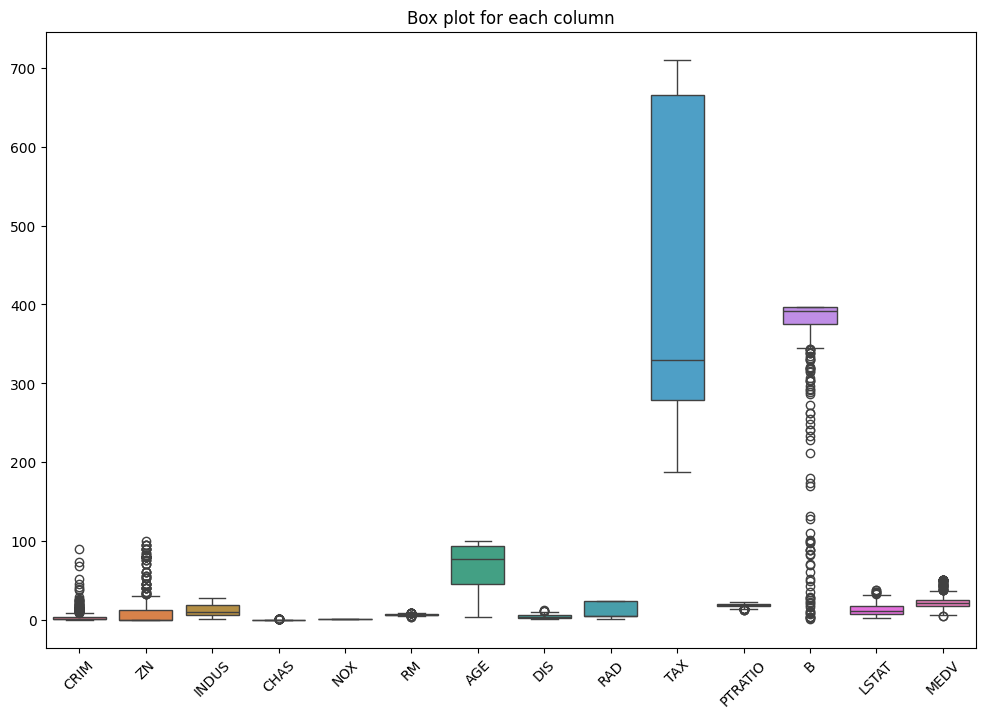

In [8]:
plt.figure(figsize=(12,8))
sns.boxplot(data=boston)
plt.title("Box plot for each column")
plt.xticks(rotation=45)
plt.show()

In [9]:
# Assuming you have your DataFrame 'boston'
Q1 = boston.quantile(0.25)
Q3 = boston.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using Boolean arrays
outlier_mask = ((boston < (Q1 - 1.5 * IQR)) | (boston > (Q3 + 1.5 * IQR)))

# Count the number of outliers in each column
num_outliers = outlier_mask.sum()

print("Number of outliers per column:")
print(num_outliers)

Number of outliers per column:
CRIM       65
ZN         63
INDUS       0
CHAS       34
NOX         0
RM         30
AGE         0
DIS         5
RAD         0
TAX         0
PTRATIO    15
B          77
LSTAT       7
MEDV       40
dtype: int64


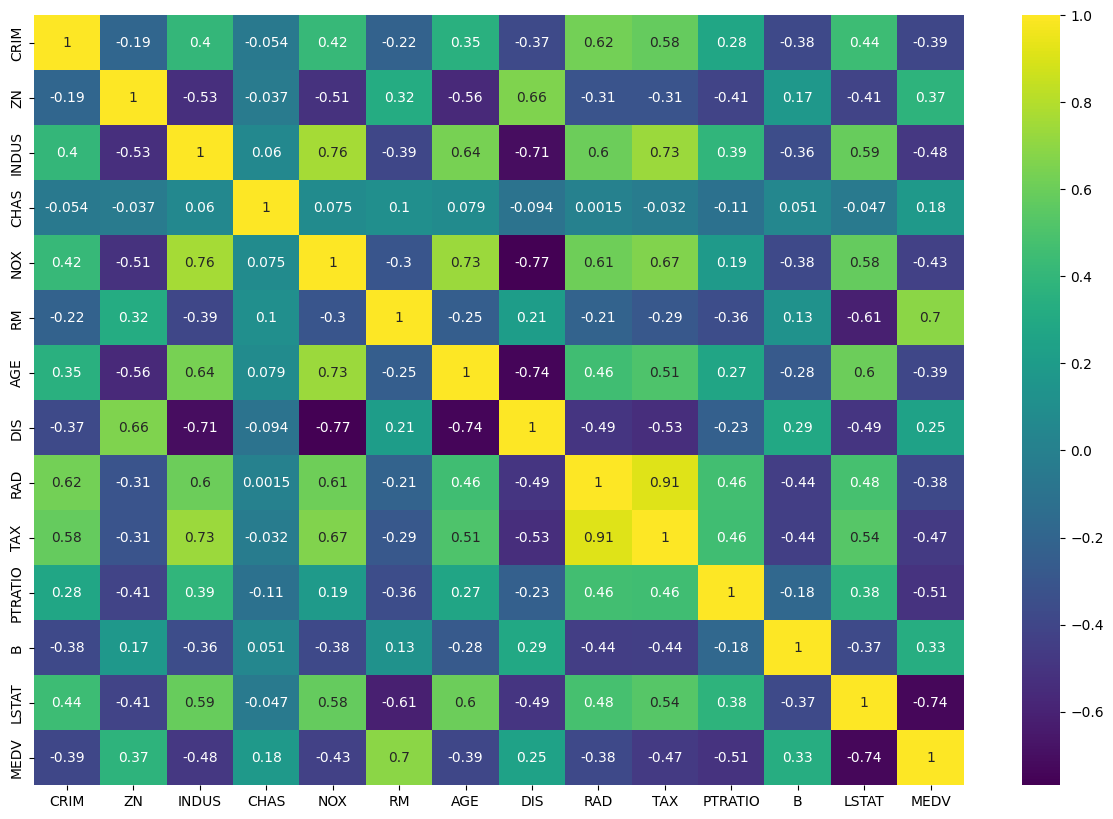

In [10]:
#heatmap
corr_matrix = boston.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix,cmap="viridis", annot=True)
plt.show()

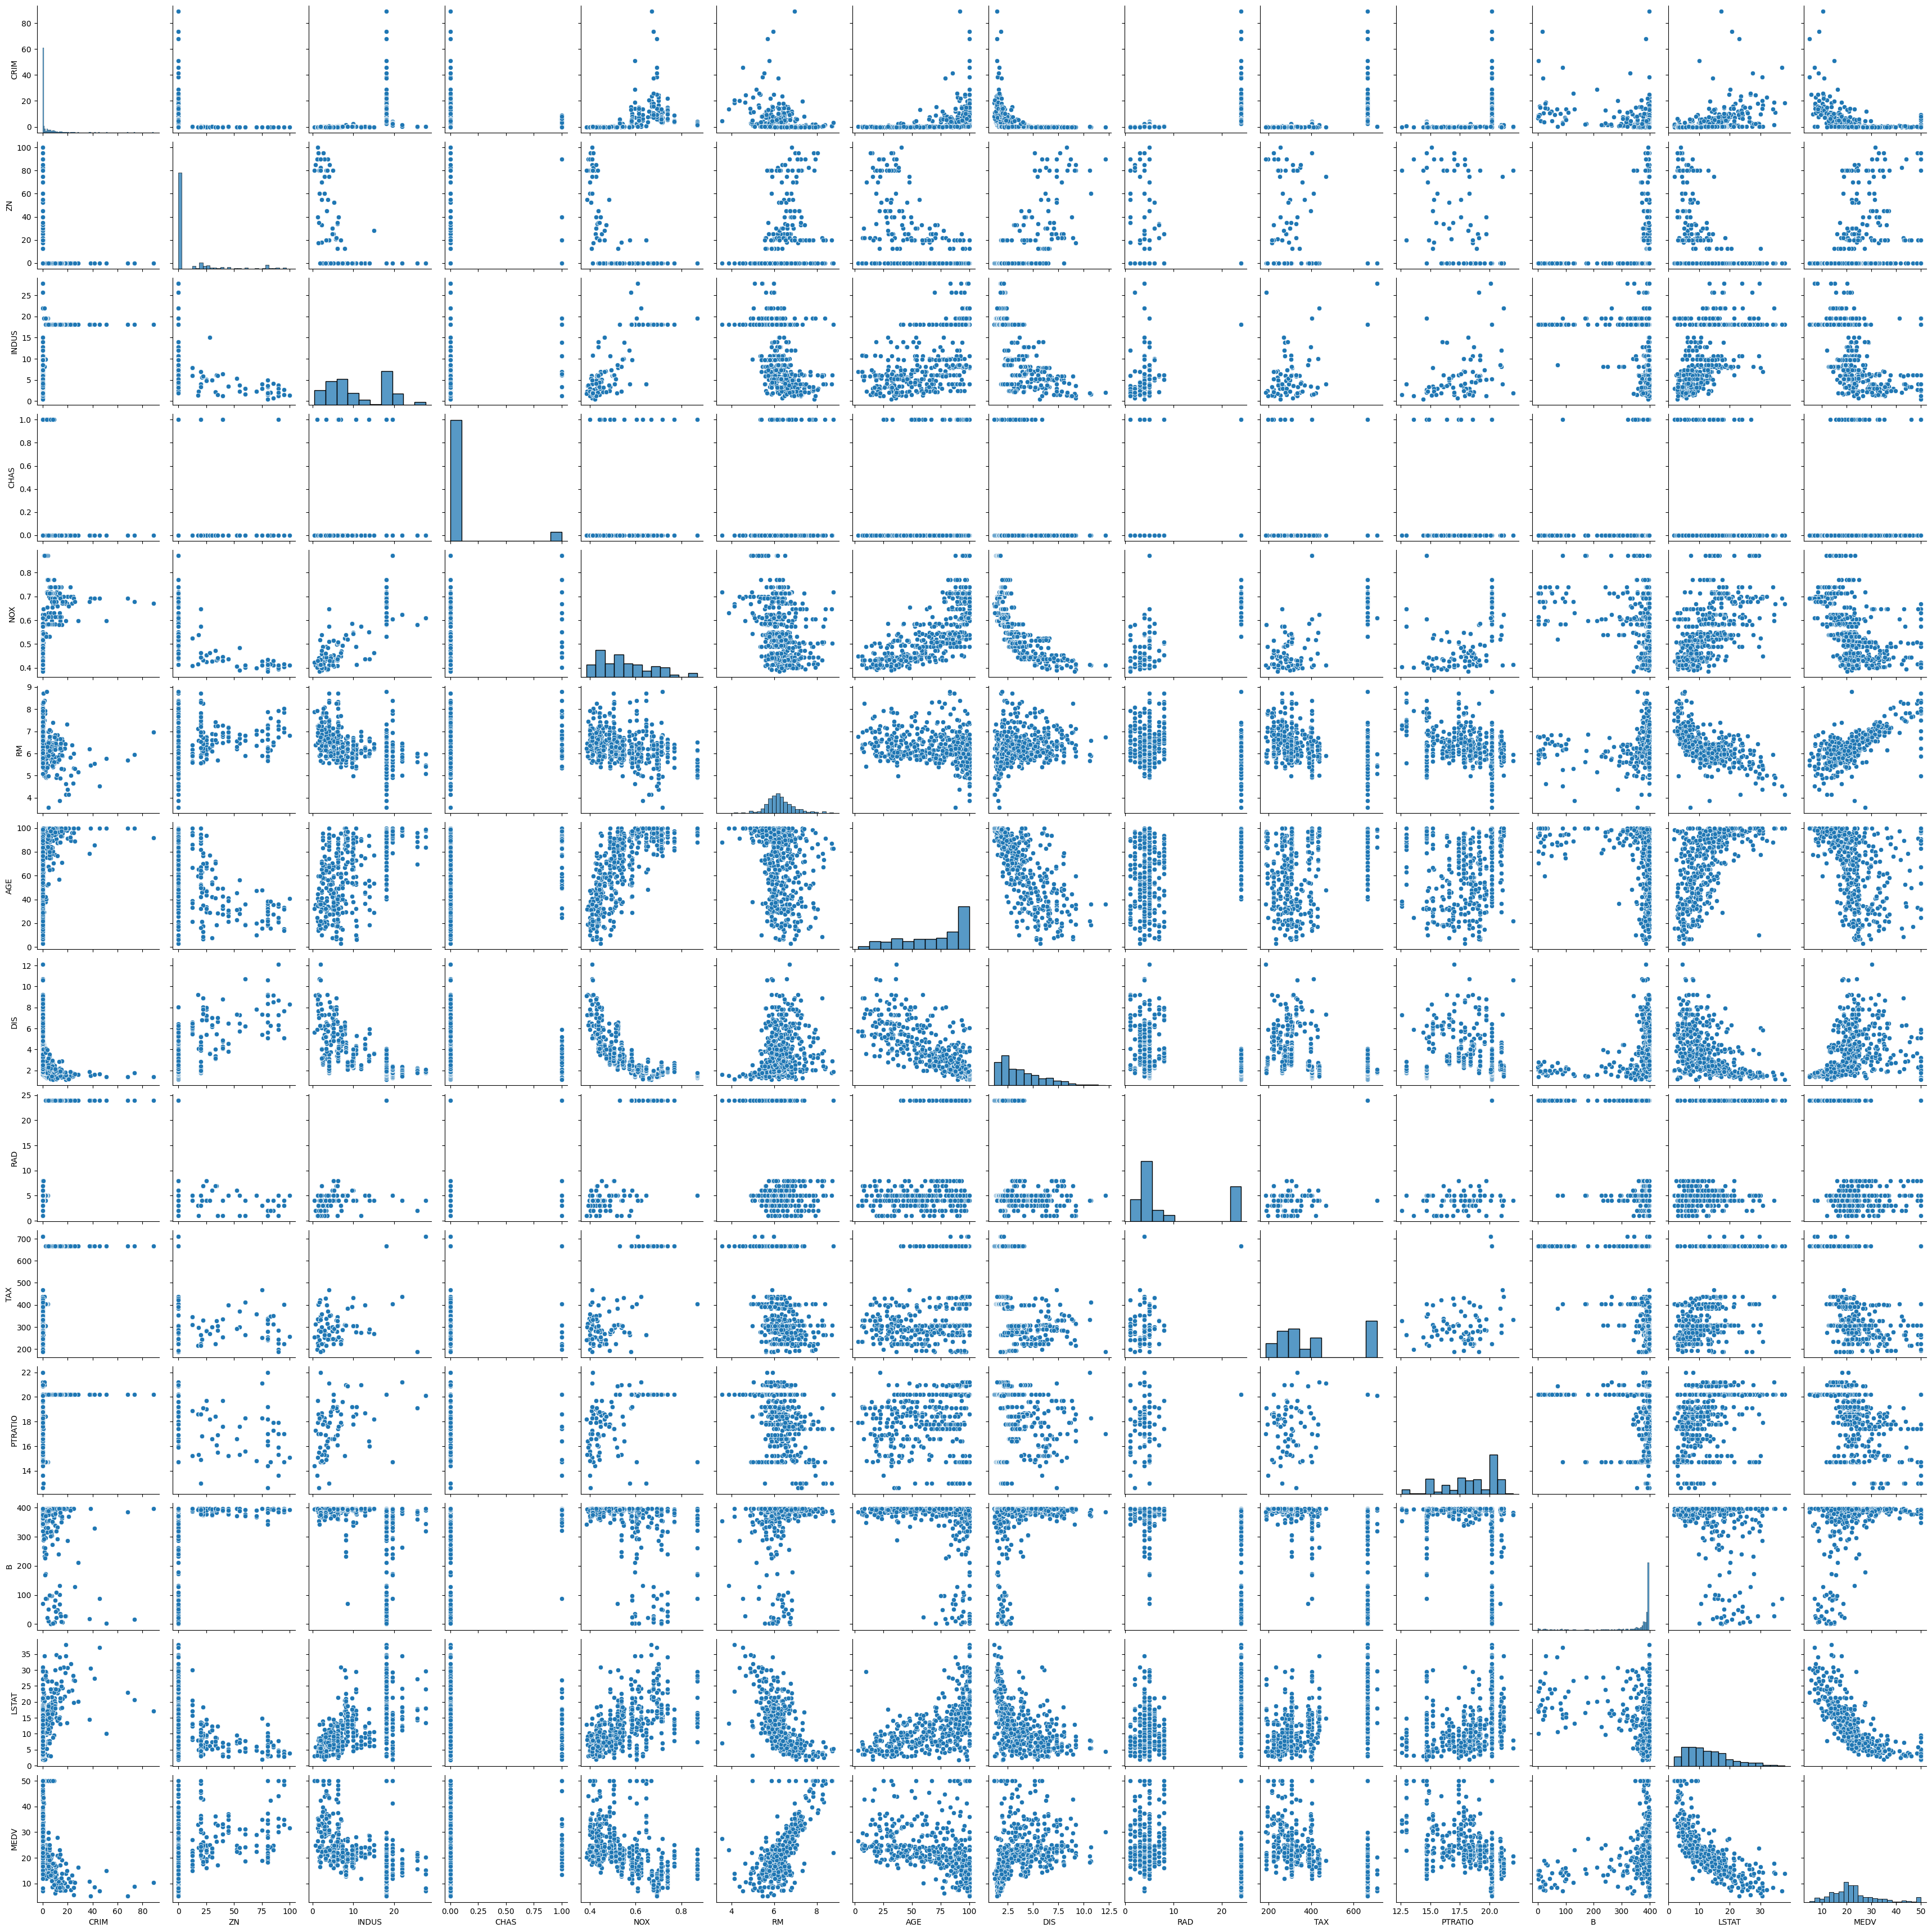

In [11]:
# pair plot

sns.pairplot(boston)

In [12]:
# drop the columns which have more null values and outilers from the dataframe
boston.drop(columns = ["B","CHAS","DIS"], inplace = True)

In [13]:
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO',
       'LSTAT', 'MEDV'],
      dtype='object')

In [14]:
# List of columns with NaN values
na_columns = ['CRIM', 'ZN', 'INDUS', 'AGE', 'LSTAT']

# Fill NaN values in these columns with the mean of the column
boston[na_columns] = boston[na_columns].fillna(boston.mean())

boston

CRIM    ZN  INDUS    NOX     RM        AGE  RAD  TAX  PTRATIO  \
0    0.00632  18.0   2.31  0.538  6.575  65.200000    1  296     15.3   
1    0.02731   0.0   7.07  0.469  6.421  78.900000    2  242     17.8   
2    0.02729   0.0   7.07  0.469  7.185  61.100000    2  242     17.8   
3    0.03237   0.0   2.18  0.458  6.998  45.800000    3  222     18.7   
4    0.06905   0.0   2.18  0.458  7.147  54.200000    3  222     18.7   
..       ...   ...    ...    ...    ...        ...  ...  ...      ...   
501  0.06263   0.0  11.93  0.573  6.593  69.100000    1  273     21.0   
502  0.04527   0.0  11.93  0.573  6.120  76.700000    1  273     21.0   
503  0.06076   0.0  11.93  0.573  6.976  91.000000    1  273     21.0   
504  0.10959   0.0  11.93  0.573  6.794  89.300000    1  273     21.0   
505  0.04741   0.0  11.93  0.573  6.030  68.518519    1  273     21.0   

         LSTAT  MEDV  
0     4.980000  24.0  
1     9.140000  21.6  
2     4.030000  34.7  
3     2.940000  33.4  
4    12.715432  36.2  
..         ...   ...  
501  12.715432  22.4  
502   9.080000  20.6  
503   5.640000  23.9  
504   6.480000  22.0  
505   7.880000  11.9  

[506 rows x 11 columns]

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >]], dtype=object)

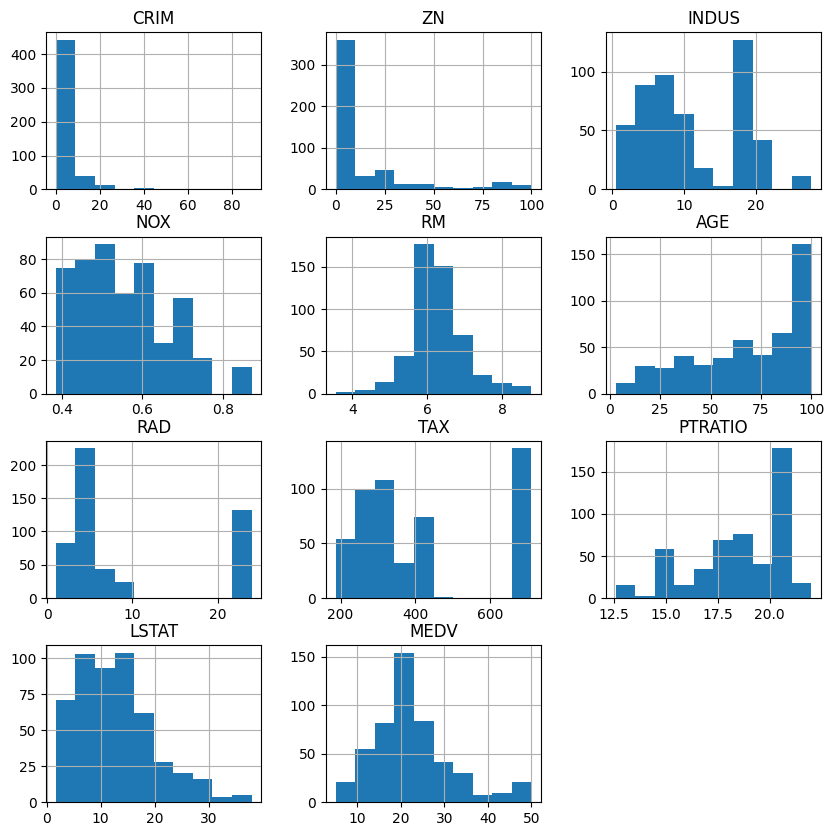

In [15]:
boston.hist(figsize = (10,10))

# Data Spliting and Scaling

In [16]:
#Spliting the data into training and testing sets
X = boston.drop(["MEDV"],axis = 1) # all attributes except the dependent
y = boston["MEDV"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [17]:
print("The dimension of X_train is {}".format(X_train.shape))
print("The dimension of X_train is {}".format(X_test.shape))

The dimension of X_train is (404, 10)
The dimension of X_train is (102, 10)


In [18]:
# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Linear and Ridge Regression Models

we will build a linear and a ridge regression model and then compare the coefficients in a plot. The score of the train and test sets will also help us evaluate how well the model performs

In [19]:
# Model
model = LinearRegression()
# Fit model
model.fit(X_train, y_train)

# predict
pred = model.predict(X_test)

train_score_lr = model.score(X_train,y_train)
test_score_lr = model.score(X_test, y_test)
print("The train score for lr model is {}".format(train_score_lr))
print("The test score for lr model is {}".format(test_score_lr))

The train score for lr model is 0.6921084986367545
The test score for lr model is 0.6344933807756957


# Ridge Regression Model

In [20]:
#Ridge Regression Model
ridgeReg = Ridge(alpha=10)
ridgeReg.fit(X_train,y_train)

#train and test scorefor ridge regression
train_score_ridge = ridgeReg.score(X_train, y_train)
test_score_ridge = ridgeReg.score(X_test, y_test)

print("\nRidge Model............................................\n")
print("The train score for ridge model is {}".format(train_score_ridge))
print("The test score for ridge model is {}".format(test_score_ridge))


Ridge Model............................................

The train score for ridge model is 0.691537560696982
The test score for ridge model is 0.6312332665551286


# Lasso regression model

In [21]:
#Lasso regression model
print("\nLasso Model............................................\n")
lasso = Lasso(alpha = 10)
lasso.fit(X_train,y_train)
train_score_ls =lasso.score(X_train,y_train)
test_score_ls =lasso.score(X_test,y_test)

print("The train score for ls model is {}".format(train_score_ls))
print("The test score for ls model is {}".format(test_score_ls))



Lasso Model............................................

The train score for ls model is 0.0
The test score for ls model is -0.023340500652033302


# Selecting Optimal Alpha Values Using Cross-Validation in Sklearn

In [22]:
#Using the linear CV model
from sklearn.linear_model import LassoCV

#Lasso Cross validation
lasso_cv = LassoCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10], random_state=0).fit(X_train, y_train)


#score
print(lasso_cv.score(X_train, y_train))
print(lasso_cv.score(X_test, y_test))


0.6921084921146403
0.6344800837777889


# linear CV model

In [23]:
#Using the linear CV model
from sklearn.linear_model import RidgeCV

#Lasso Cross validation
ridge_cv = RidgeCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10]).fit(X_train, y_train)

#score
print("The train score for ridge model is {}".format(ridge_cv.score(X_train, y_train)))
print("The train score for ridge model is {}".format(ridge_cv.score(X_test, y_test)))

The train score for ridge model is 0.6915375606969818
The train score for ridge model is 0.631233266555127


# Conclusion:

We have seen an implementation of ridge and lasso regression models and the theoretical and mathematical concepts behind these techniques. Some of the key takeaways include:


We have explored the implementation of ridge and lasso regression models, including their theoretical and mathematical concepts. Key points from this tutorial are:

1. The cost functions for both ridge and lasso regression are alike, but ridge regression squares the coefficients while lasso regression takes their magnitude.
2. Lasso regression is useful for automatic feature selection because its constrained region's geometry allows coefficient values to shrink to zero.
3. An alpha value of zero in ridge or lasso models yields results similar to a standard regression model.
4. Higher alpha values lead to more aggressive penalization.